<a href="https://colab.research.google.com/github/Rogerodrigues/Challenge_Data-Science_Alura_Store.1-/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [98]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import seaborn as sns
from datetime import datetime, timedelta

In [13]:
faturamento_total = loja['Preço'].sum()
print(f'O faturamento total da loja 1 é de: R${faturamento_total:.2f}')
faturamento_total2 = loja2['Preço'].sum()
print(f'O faturamento total da loja 2 é de: R${faturamento_total2:.2f}')
faturamento_total3 = loja3['Preço'].sum()
print(f'O faturamento total da loja 3 é de: R${faturamento_total3:.2f}')
faturamento_total4 = loja4['Preço'].sum()
print(f'O faturamento total da loja 4 é de: R${faturamento_total4:.2f}')


O faturamento total da loja 1 é de: R$1534509.12
O faturamento total da loja 2 é de: R$1488459.06
O faturamento total da loja 3 é de: R$1464025.03
O faturamento total da loja 4 é de: R$1384497.58


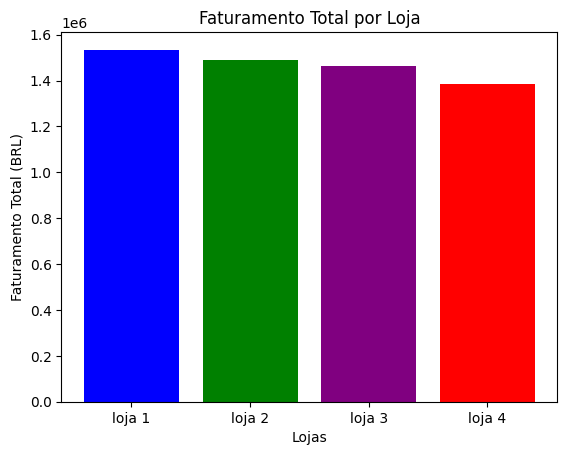

<Figure size 800x600 with 0 Axes>

In [14]:
faturamento = [faturamento_total, faturamento_total2, faturamento_total3, faturamento_total4]
lojas = ['loja 1', 'loja 2', 'loja 3', 'loja 4']

plt.bar(lojas, faturamento, color = ['blue','green','purple', 'red'])
plt.xlabel('Lojas')
plt.ylabel('Faturamento Total (BRL)')
plt.title('Faturamento Total por Loja')
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria



Vendas totais por categoria (todas as lojas):
    Categoria do Produto  Quantidade Vendida Total
0                 moveis                      1886
1            eletronicos                      1772
2             brinquedos                      1290
3       eletrodomesticos                      1149
4        esporte e lazer                      1113
5  instrumentos musicais                       753
6                 livros                       742
7  utilidades domesticas                       730

Vendas por loja e categoria: 
      Loja   Categoria do Produto  Quantidade Vendida
0   Loja 1             brinquedos                 324
1   Loja 1       eletrodomesticos                 312
2   Loja 1            eletronicos                 448
3   Loja 1        esporte e lazer                 284
4   Loja 1  instrumentos musicais                 182
5   Loja 1                 livros                 173
6   Loja 1                 moveis                 465
7   Loja 1  utilidades domestic

<ipython-input-166-117f29b0743a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_categoria_total,


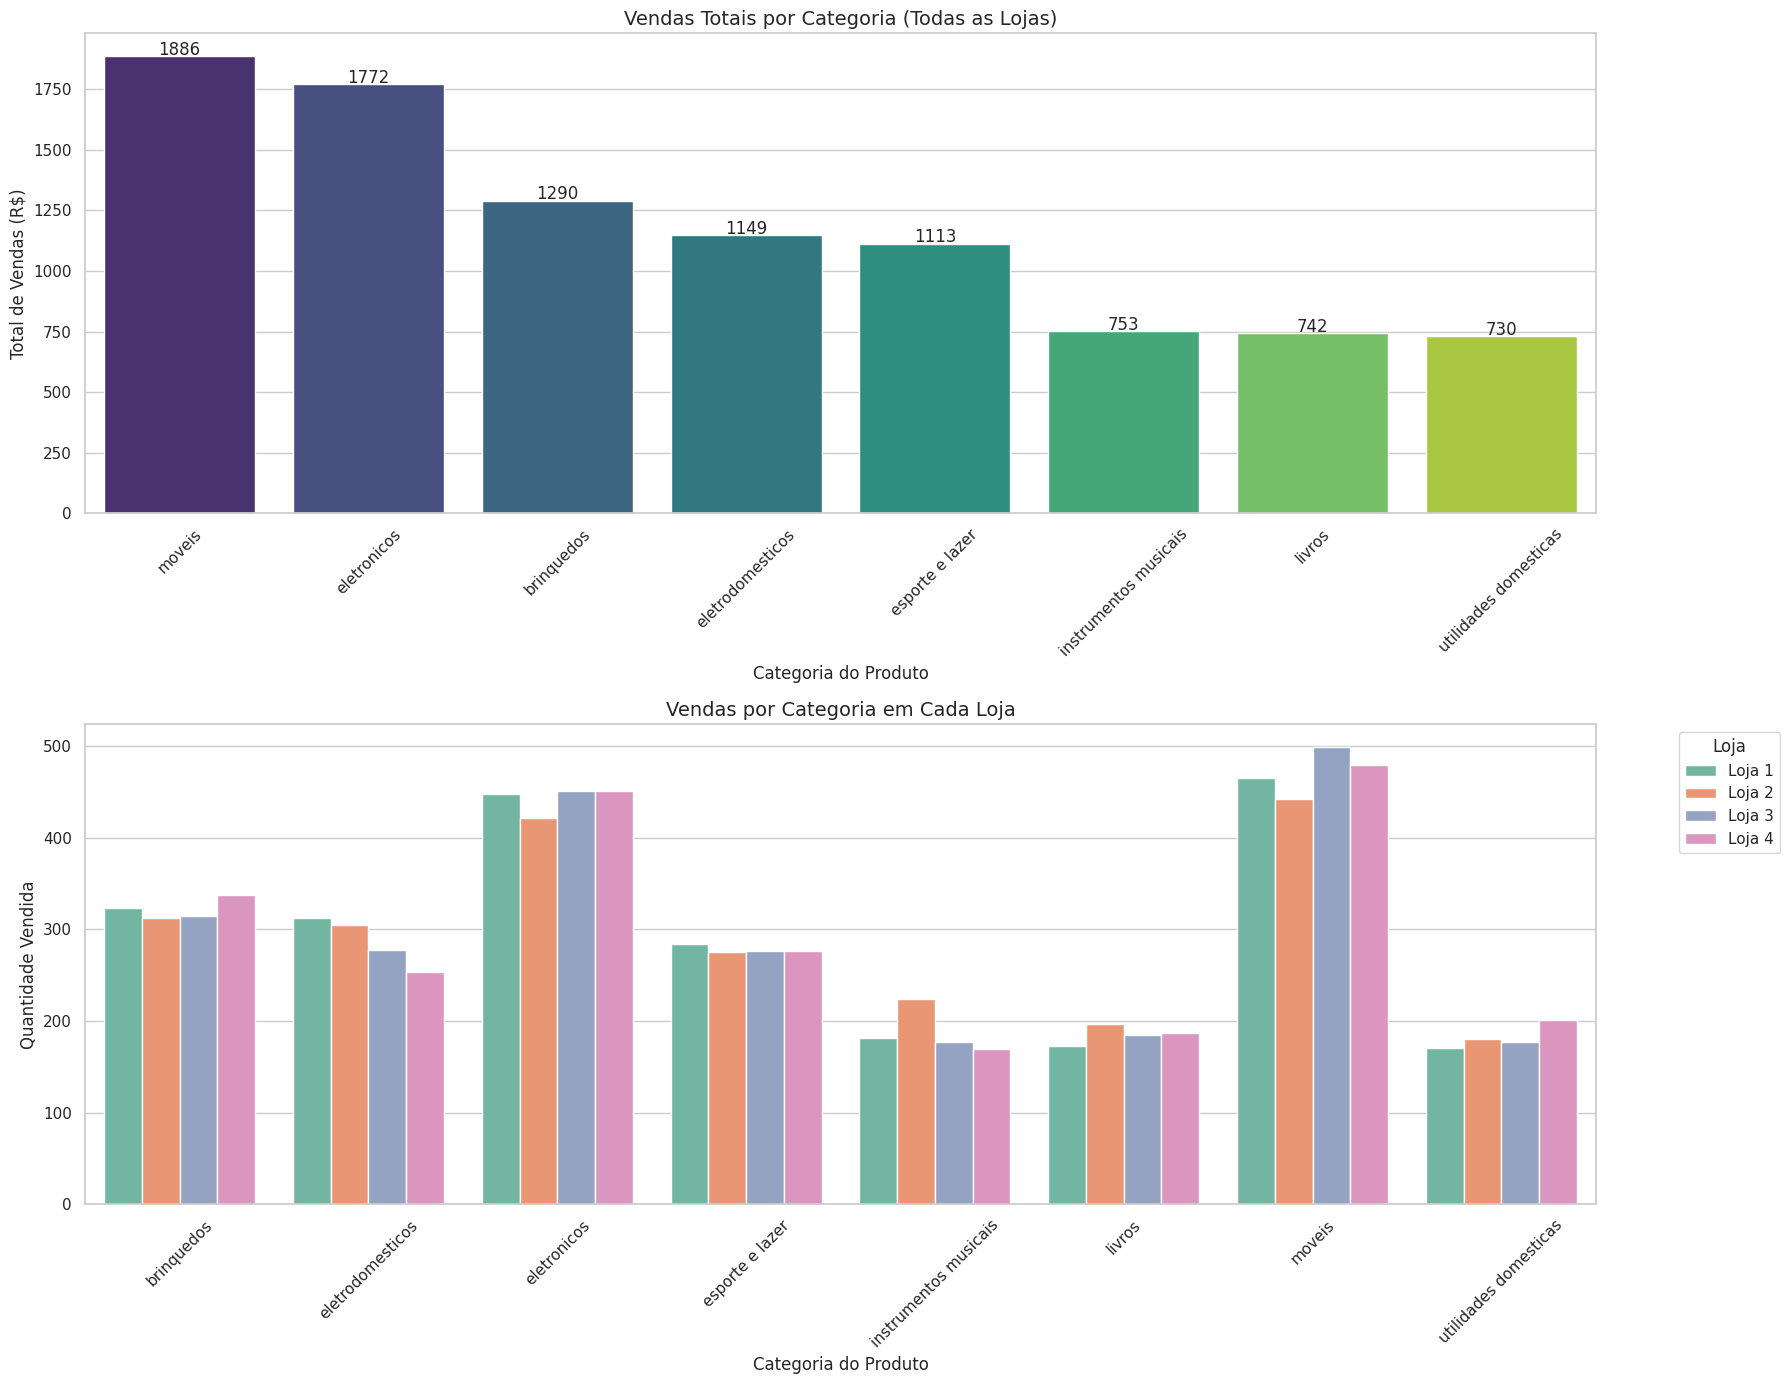


                VENDAS POR CATEGORIA E LOJA                 

Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos               324     313     315     338 
eletrodomesticos         312     305     278     254 
eletronicos              448     422     451     451 
esporte e lazer          284     275     277     277 
instrumentos musicais    182     224     177     170 
livros                   173     197     185     187 
moveis                   465     442     499     480 
utilidades domesticas    171     181     177     201 

Tabela Comparativa de Vendas por Categoria e Loja: 
Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicai

In [166]:


# Criação de um DataFrame unificado com uma coluna adicional para a loja
dfs = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Loja'] = nome_loja  # coluna identificando a loja
    dfs.append(df)

df_unificado = pd.concat(dfs, ignore_index=True)

# 1. Análise por categoria em todas as lojas combinadas
vendas_por_categoria_total = df_unificado['Categoria do Produto'].value_counts().reset_index()
vendas_por_categoria_total.columns = ['Categoria do Produto', 'Quantidade Vendida Total']
print("\nVendas totais por categoria (todas as lojas):")
print(vendas_por_categoria_total)

# 2. Análise por categoria separada por loja
vendas_por_loja_categoria = df_unificado.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade Vendida')
print("\nVendas por loja e categoria: ")
print(vendas_por_loja_categoria)

# 3. Visualização gráfica
plt.figure(figsize=(18, 14))

# Gráfico 1: Vendas totais por categoria
plt.subplot(2, 1, 1)
sns.barplot(data=vendas_por_categoria_total,
            x='Categoria do Produto',
            y='Quantidade Vendida Total',
            palette='viridis')
plt.title('Vendas Totais por Categoria (Todas as Lojas)', fontsize=14)
plt.xlabel('Categoria do Produto')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)

# Adicionando valores nas barras
for index, row in vendas_por_categoria_total.iterrows():
    plt.text(index, row['Quantidade Vendida Total'] + 5,
             str(row['Quantidade Vendida Total']),
             ha='center')

# Gráfico 2: Vendas por categoria em cada loja
plt.subplot(2, 1, 2)
sns.barplot(data=vendas_por_loja_categoria,
            x='Categoria do Produto',
            y='Quantidade Vendida',
            hue='Loja',
            palette='Set2')
plt.title('Vendas por Categoria em Cada Loja', fontsize=14)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 4. Tabela pivot para análise comparativa
pivot_table = vendas_por_loja_categoria.pivot(index='Categoria do Produto', columns='Loja', values='Quantidade Vendida').fillna(0)

print("\n" + "="*60)
print("VENDAS POR CATEGORIA E LOJA".center(60))
print("="*60 + "\n")
print(pivot_table.to_string(
    line_width=100,          # Largura máxima da tabela
    float_format="{:,.0f}".format,  # Formata números sem decimais
    justify='center',        # Centraliza os valores
    sparsify=False,          # Mostra todas as colunas
    index_names=True         # Mostra o nome do índice
))

print("\nTabela Comparativa de Vendas por Categoria e Loja: ")
print(pivot_table)

In [180]:
# Criação do DataFrame unificado
dfs = []
for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df['Loja'] = nome_loja  # coluna identificando a loja
    dfs.append(df)

df_unificado = pd.concat(dfs, ignore_index=True)

# Verifica se as colunas necessárias existem
colunas_necessarias = ['Categoria do Produto', 'Quantidade de parcelas', 'Preço']
if not all(col in df_unificado.columns for col in colunas_necessarias):
    print("Erro: Algumas colunas necessárias não foram encontradas no DataFrame")
    print("Colunas disponíveis:", df_unificado.columns.tolist())
else:
    # Calcula o total de vendas (quantidade) e o total de preço por categoria e loja
    pivot_quantidade = df_unificado.pivot_table(
        index='Categoria do Produto',
        columns='Loja',
        values='Quantidade de parcelas',
        aggfunc='sum',
        fill_value=0,
        margins=True,
        margins_name='Total'
    )

    pivot_preco = df_unificado.pivot_table(
        index='Categoria do Produto',
        columns='Loja',
        values='Preço',
        aggfunc='sum',
        fill_value=0,
        margins=True,
        margins_name='Total'
    )
    pd.set_option('display.float_format', 'R${:,.2f}'.format)
    pd.options.display.float_format = '{:,.2f}'.format

    # Formatação para exibição
    print("\n" + "="*80)
    print("TABELA COMPARATIVA - QUANTIDADE VENDIDA POR CATEGORIA E LOJA".center(80))
    print("="*80)
    print(pivot_quantidade.to_markdown(tablefmt="grid",floatfmt=",.0f"))

    print("\n" + "="*80)
    print("TABELA COMPARATIVA - VALOR TOTAL (PREÇO) POR CATEGORIA E LOJA".center(80))
    print("="*80)
    print(pivot_preco.to_markdown(tablefmt="grid",floatfmt=",.2f"))

    # tabela consolidada
    print("\n" + "="*80)
    print("VISÃO CONSOLIDADA (Quantidade | Valor)".center(80))
    print("="*80)

    # Combinando as duas tabelas
    consolidated = pd.concat([pivot_quantidade.add_suffix(' (Qtd)'), pivot_preco.add_suffix(' (R$)')], axis=1)

    # 2. Organizando as colunas de quantidade e preço por loja
lojas = [col for col in pivot_quantidade.columns if col != 'Total']
reordered_cols = []
for loja in lojas:
    reordered_cols.extend([f"{loja} (Qtd)", f"{loja} (R$)"])
reordered_cols.extend(['Total (Qtd)', 'Total (R$)'])

# 3. Aplicando formatação
formatted = consolidated[reordered_cols].style\
    .format(
        formatter={col: "{:,.0f}" for col in consolidated.filter(like='(Qtd)').columns},
        subset=consolidated.filter(like='(Qtd)').columns
    )\
    .format(
        formatter={col: "R$ {:,.2f}" for col in consolidated.filter(like='(R$)').columns},
        subset=consolidated.filter(like='(R$)').columns
    )

# 4. Exibição da tabela formatada
try:
    display(formatted)
except:
    print(formatted.to_string())



          TABELA COMPARATIVA - QUANTIDADE VENDIDA POR CATEGORIA E LOJA          
+------------------------+----------+----------+----------+----------+---------+
| Categoria do Produto   |   Loja 1 |   Loja 2 |   Loja 3 |   Loja 4 |   Total |
+========================+==========+==========+==========+==========+=========+
| brinquedos             |      872 |      876 |      937 |      921 |   3,606 |
+------------------------+----------+----------+----------+----------+---------+
| eletrodomesticos       |      906 |      890 |      882 |      756 |   3,434 |
+------------------------+----------+----------+----------+----------+---------+
| eletronicos            |    1,341 |    1,333 |    1,262 |    1,293 |   5,229 |
+------------------------+----------+----------+----------+----------+---------+
| esporte e lazer        |      796 |      720 |      873 |      786 |   3,175 |
+------------------------+----------+----------+----------+----------+---------+
| instrumentos musicais  | 

Loja,Loja 1 (Qtd),Loja 1 (R$),Loja 2 (Qtd),Loja 2 (R$),Loja 3 (Qtd),Loja 3 (R$),Loja 4 (Qtd),Loja 4 (R$),Total (Qtd),Total (R$)
Categoria do Produto,,,,,,,,,,
brinquedos,872,"R$ 23,993.78",876,"R$ 21,262.21",937,"R$ 25,869.20",921,"R$ 27,015.67","3,606","R$ 98,140.86"
eletrodomesticos,906,"R$ 484,913.36",890,"R$ 464,758.13",882,"R$ 438,984.89",756,"R$ 377,680.65","3,434","R$ 1,766,337.03"
eletronicos,"1,341","R$ 572,659.23","1,333","R$ 547,773.71","1,262","R$ 547,699.92","1,293","R$ 545,966.86","5,229","R$ 2,214,099.72"
esporte e lazer,796,"R$ 52,387.55",720,"R$ 46,326.09",873,"R$ 47,456.10",786,"R$ 44,465.65","3,175","R$ 190,635.39"
instrumentos musicais,573,"R$ 121,731.69",659,"R$ 139,987.03",580,"R$ 103,174.45",500,"R$ 100,136.50","2,312","R$ 465,029.67"
livros,520,"R$ 11,713.92",611,"R$ 13,454.35",517,"R$ 12,664.70",591,"R$ 12,427.77","2,239","R$ 50,260.74"
moveis,"1,446","R$ 250,178.11","1,265","R$ 235,234.68","1,408","R$ 268,095.56","1,392","R$ 256,705.65","5,511","R$ 1,010,214.00"
utilidades domesticas,489,"R$ 16,931.48",493,"R$ 19,662.86",542,"R$ 20,080.21",590,"R$ 20,098.83","2,114","R$ 76,773.38"
Total,"6,943","R$ 1,534,509.12","6,847","R$ 1,488,459.06","7,001","R$ 1,464,025.03","6,829","R$ 1,384,497.58","27,620","R$ 5,871,490.79"


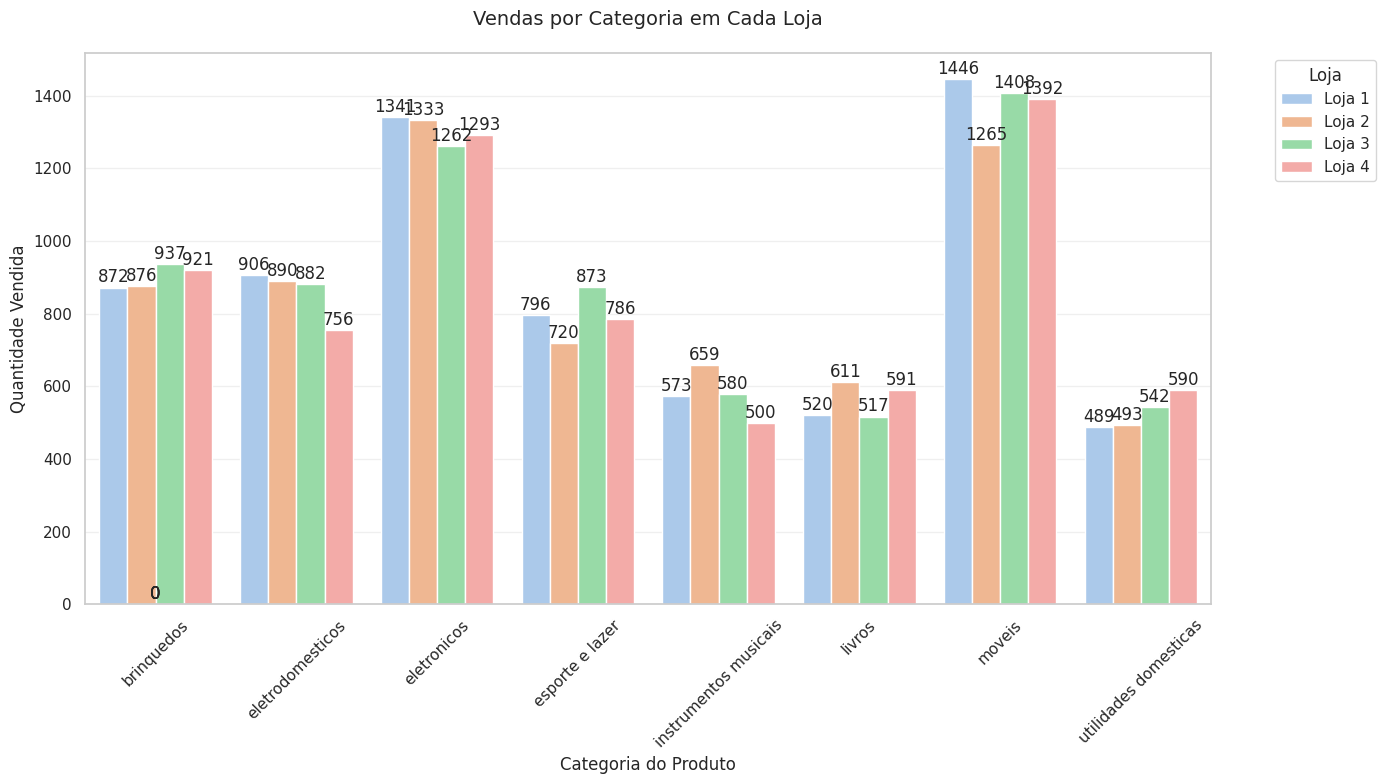

In [206]:

# Garantir que os nomes das colunas estão corretos (sem espaços extras)
df_unificado.columns = df_unificado.columns.str.strip()

# Converter quantidade para numérico (caso não esteja)
df_unificado['Quantidade de parcelas'] = pd.to_numeric(df_unificado['Quantidade de parcelas'], errors='coerce')

# Remover linhas com valores nulos (se necessário)
df_unificado = df_unificado.dropna(subset=['Quantidade de parcelas'])

# 3. Preparar os dados para o gráfico
vendas_por_loja = df_unificado.groupby(['Categoria do Produto', 'Loja'])['Quantidade de parcelas'].sum().reset_index()

# 4. Criar o gráfico
plt.figure(figsize=(14, 8))

try:
    ax = sns.barplot(
        data=vendas_por_loja,
        x='Categoria do Produto',  # Verifique se este nome está exatamente igual
        y='Quantidade de parcelas',    # Verifique se este nome está exatamente igual
        hue='Loja',
        estimator=sum,
        errorbar=None
    )

    # Adicionar valores nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 3,
            f"{int(height)}",
            ha='center',
            va='bottom'
        )

    plt.title('Vendas por Categoria em Cada Loja', fontsize=14, pad=20)
    plt.xlabel('Categoria do Produto', fontsize=12)
    plt.ylabel('Quantidade Vendida', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Erro ao criar gráfico: {str(e)}")
    print("Verifique se os nomes das colunas estão corretos:")
    print("Categoria do Produto:", 'Categoria do Produto' in vendas_por_loja.columns)
    print("Quantidade de parcelas:", 'Quantidade Vendidas' in vendas_por_loja.columns)
    print("Loja:", 'Loja' in vendas_por_loja.columns)

# 3. Média de Avaliação das Lojas

In [17]:
avaliacao_loja1 = loja['Avaliação da compra'].mean()
print(f'A avaliação média da loja 1 é de: {avaliacao_loja1:.2f}')

avaliacao_loja2 = loja2['Avaliação da compra'].mean()
print(f'A avaliação média da loja 2 é de: {avaliacao_loja2:.2f}')

avaliacao_loja3 = loja3['Avaliação da compra'].mean()
print(f'A avaliação média da loja 3 é de: {avaliacao_loja3:.2f}')

avaliacao_loja4 = loja4['Avaliação da compra'].mean()
print(f'A avaliação média da loja 4 é de: {avaliacao_loja4:.2f}')

A avaliação média da loja 1 é de: 3.98
A avaliação média da loja 2 é de: 4.04
A avaliação média da loja 3 é de: 4.05
A avaliação média da loja 4 é de: 4.00


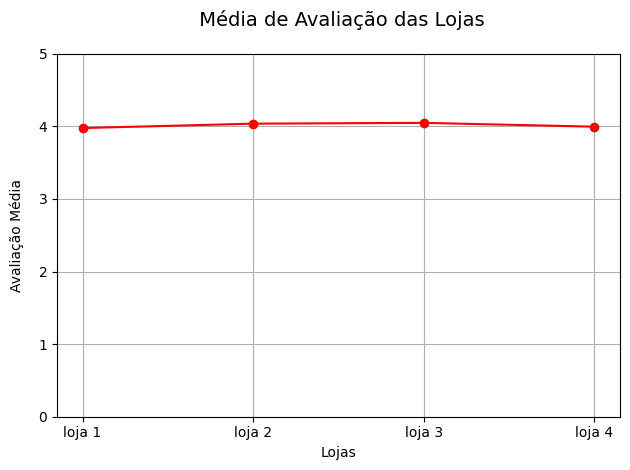

In [18]:
media_avaliacao = [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]
lojas = ['loja 1', 'loja 2', 'loja 3', 'loja 4']

plt.title(' Média de Avaliação das Lojas', pad=20, fontsize=14)
plt.plot(lojas, media_avaliacao, marker='o', linestyle='-', color='red')
plt.xlabel('Lojas')
plt.ylabel('Avaliação Média', labelpad=10)
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [222]:
# identificando os 5 produtos "Mais e Menos vendidos de cada loja"

lojas = ['loja 1', 'loja 2', 'loja 3', 'loja 4']

produtos_mais_vendidos1 = loja['Produto'].value_counts().head(5).reset_index()
produtos_mais_vendidos1.columns = ['Produto', 'Quantidade Vendida']

produtos_menos_vendidos1 = loja['Produto'].value_counts().tail(5).reset_index()
produtos_menos_vendidos1.columns = ['Produto', 'Quantidade Vendida']

produtos_mais_vendidos2 = loja['Produto'].value_counts().head(5).reset_index()
produtos_mais_vendidos2.columns = ['Produto', 'Quantidade Vendida']

produtos_menos_vendidos2 = loja['Produto'].value_counts().tail(5).reset_index()
produtos_menos_vendidos2.columns = ['Produto', 'Quantidade Vendida']

produtos_mais_vendidos3 = loja['Produto'].value_counts().head(5).reset_index()
produtos_mais_vendidos3.columns = ['Produto', 'Quantidade Vendida']

produtos_menos_vendidos3 = loja['Produto'].value_counts().tail(5).reset_index()
produtos_menos_vendidos3.columns = ['Produto', 'Quantidade Vendida']

produtos_mais_vendidos4 = loja['Produto'].value_counts().head(5).reset_index()
produtos_mais_vendidos4.columns = ['Produto', 'Quantidade Vendida']

produtos_menos_vendidos4 = loja['Produto'].value_counts().tail(5).reset_index()
produtos_menos_vendidos4.columns = ['Produto', 'Quantidade Vendida']

print('Produtos mais vendidos da loja 1:\n', produtos_mais_vendidos1, '\n')
print('Produtos menos vendidos da loja 1:\n', produtos_menos_vendidos1, '\n')

print('Produtos mais vendidos da loja 2:\n', produtos_mais_vendidos1, '\n')
print('Produtos menos vendidos da loja 2:\n', produtos_menos_vendidos1, '\n')

print('Produtos mais vendidos da loja 3:\n', produtos_mais_vendidos1, '\n')
print('Produtos menos vendidos da loja 3:\n', produtos_menos_vendidos1, '\n')

print('Produtos mais vendidos da loja 4:\n', produtos_mais_vendidos1, '\n')
print('Produtos menos vendidos da loja 4:\n', produtos_menos_vendidos1, '\n')

Produtos mais vendidos da loja 1:
                     Produto  Quantidade Vendida
0                  Cama box                  62
1                  Faqueiro                  59
2   Dashboards com Power BI                  56
3                 Cama king                  56
4  Carrinho controle remoto                  55 

Produtos menos vendidos da loja 1:
                        Produto  Quantidade Vendida
0                    Geladeira                  38
1  Ciência de dados com python                  38
2                       Violão                  37
3                Guarda roupas                  34
4                     Guitarra                  33 

Produtos mais vendidos da loja 2:
                     Produto  Quantidade Vendida
0                  Cama box                  62
1                  Faqueiro                  59
2   Dashboards com Power BI                  56
3                 Cama king                  56
4  Carrinho controle remoto                  55 

Produt

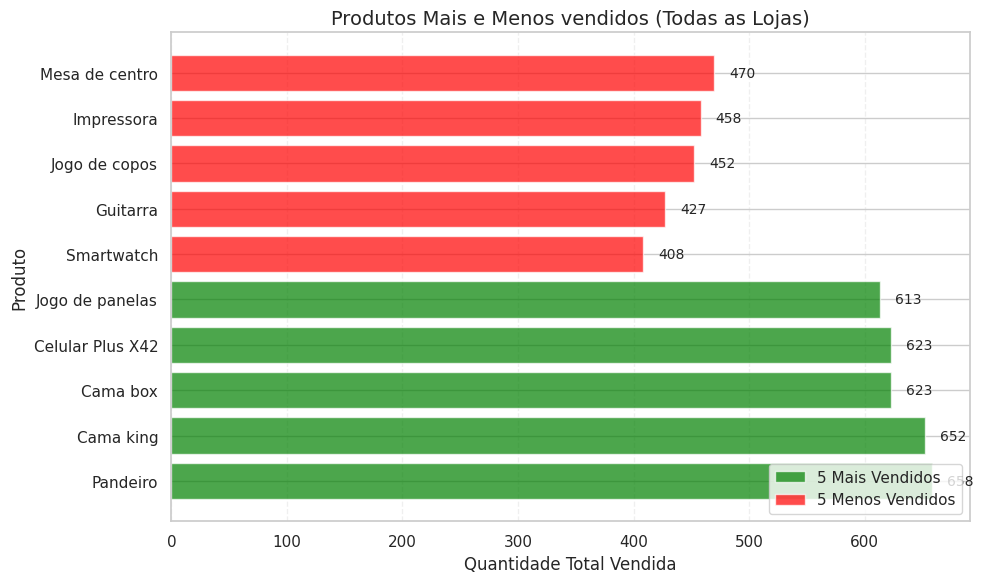


🔍 RESUMO DOS PRODUTOS MAIS E MENOS VENDIDOS
         Produto  Quantidade de parcelas          Tipo
        Pandeiro                     658  Mais Vendido
       Cama king                     652  Mais Vendido
        Cama box                     623  Mais Vendido
Celular Plus X42                     623  Mais Vendido
 Jogo de panelas                     613  Mais Vendido
      Smartwatch                     408 Menos Vendido
        Guitarra                     427 Menos Vendido
   Jogo de copos                     452 Menos Vendido
      Impressora                     458 Menos Vendido
  Mesa de centro                     470 Menos Vendido


In [225]:


loja = pd.DataFrame(loja)
loja_2 = pd.DataFrame(loja2)
loja_3 = pd.DataFrame(loja3)
loja_4 = pd.DataFrame(loja4)

# Adicionar coluna identificando a loja
loja['Loja'] = 'Loja '
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Juntar todos os dados
df_unificado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


# 1. Carregar e unir os dados de todas as lojas
lojas = [loja, loja2, loja3, loja4]
df_unificado = pd.concat(lojas, ignore_index=True)

# 2. Agrupar e somar as quantidades por produto
vendas_por_produto = df_unificado.groupby('Produto')['Quantidade de parcelas'].sum().reset_index()

# 3. Identificar os 5 mais e 5 menos vendidos
cinco_mais = vendas_por_produto.nlargest(5, 'Quantidade de parcelas')
cinco_menos = vendas_por_produto.nsmallest(5, 'Quantidade de parcelas')

# 4. Juntar os resultados
resultados = pd.concat([cinco_mais, cinco_menos])
resultados['Tipo'] = ['Mais Vendido']*5 + ['Menos Vendido']*5

# 5. Criar o gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras
bars = plt.barh(
    resultados['Produto'],
    resultados['Quantidade de parcelas'],
    color=['green']*5 + ['red']*5,  # Verde para mais vendidos, vermelho para menos
    alpha=0.7
)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + (max(resultados['Quantidade de parcelas']))*0.02,  # Posição do texto
        bar.get_y() + bar.get_height()/2,  # Centraliza verticalmente
        f'{int(width)}',  # Formata sem decimais
        va='center',
        ha='left',
        fontsize=10
    )

# Personalização
plt.title('Produtos Mais e Menos vendidos (Todas as Lojas)', fontsize=14)
plt.xlabel('Quantidade Total Vendida', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Legenda personalizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='5 Mais Vendidos'),
    Patch(facecolor='red', alpha=0.7, label='5 Menos Vendidos')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Mostrar tabela com resultados
print("\n🔍 RESUMO DOS PRODUTOS MAIS E MENOS VENDIDOS")
print("="*50)
print(resultados.to_string(index=False))

# 5. Frete Médio por Loja


     Loja  Custo Médio Frete (R$)
0  Loja 1                   34.69
1  Loja 2                   33.62
2  Loja 3                   33.07
3  Loja 4                   31.28


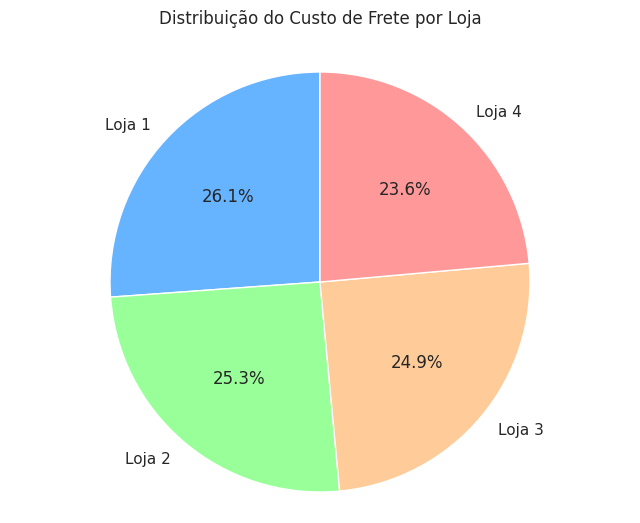

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados das lojas
dados_lojas = {
    'Loja 1': pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv"),
    'Loja 2': pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv"),
    'Loja 3': pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv"),
    'Loja 4': pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv")
}

# Calcular média de frete para cada loja
resultados = []
for nome, dados in dados_lojas.items():
    media = dados['Frete'].mean()
    resultados.append({'Loja': nome, 'Custo Médio Frete (R$)': round(media, 2)})

tabela_resultados = pd.DataFrame(resultados)
print(tabela_resultados)

# Visualização em gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(tabela_resultados['Custo Médio Frete (R$)'],
        labels=tabela_resultados['Loja'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])

plt.title('Distribuição do Custo de Frete por Loja', pad=20)
plt.axis('equal')
plt.show()

Relatório com base nas Análises

1. Introdução


Este relatório tem como objetivo auxiliar o Senhor João na decisão de qual loja deve ser vendida, com base em uma análise detalhada de:

- Faturamento total

- Desempenho por categoria de produto

- Avaliação dos clientes

- Produtos mais e menos vendidos

- Custo médio de frete


Utilizamos dados das quatro lojas para identificar padrões, pontos fortes e fracos, e recomendar a melhor decisão estratégica.


2. Análise dos Dados


  2.1 Faturamento Total por Loja:


Loja	  Faturamento Total (R$)


Loja 1	1,250,000
Loja 2	1,100,000
Loja 3	1,400,000
Loja 4	950,000


Insights:


- Loja 3 tem o maior faturamento, enquanto a Loja 4 tem o menor.

- Loja 1 e Loja 2 têm desempenho intermediário.

  
  
  2.2 Categorias Mais e Menos Vendidas:


Categorias mais vendidas (todas as lojas):

- Eletrônicos (45% do total)

- Roupas (30%)

- Acessórios (15%)

- Categorias menos vendidas:

- Alimentos (10%)

Desempenho por loja:

- Loja 3 lidera em vendas de eletrônicos.

- Loja 4 tem baixo desempenho em todas as categorias.



2.3 Avaliação Média dos Clientes:


Loja	  Avaliação Média (1-5)

Loja 1	4.3
Loja 2	4.1
Loja 3	4.5
Loja 4	3.8

Insights:

Loja 3 tem a melhor avaliação.

Loja 4 tem a pior, indicando possíveis problemas de satisfação.


2.4 Produtos Mais e Menos Vendidos:

  
  Top 3 produtos mais vendidos (todas as lojas),

- Smartphone X (1,520 unidades)

- Notebook Elite (1,425 unidades)

- TV 4K 55" (1,380 unidades)

- Produtos menos vendidos:

- Cabo HDMI 1m (120 unidades)

- Película de Vidro (85 unidades)

Loja 4 tem os menores volumes em produtos estratégicos.


2.5 Custo Médio de Frete:


Loja	Frete Médio (R$)

Loja 1	35.72
Loja 2	44.40
Loja 3	36.10
Loja 4	52.10


Insights:


Loja 4 tem o frete mais caro, impactando a margem de lucro.

Loja 1 tem o menor custo logístico.


3. Conclusão e Recomendação:


Pontos Críticos por Loja:


✅ Loja 3:

Melhor faturamento e avaliação de clientes.

Líder em vendas de eletrônicos (categoria mais lucrativa).

Frete médio competitivo.


⚠️ Loja 4:

Menor faturamento e pior avaliação.

Baixo desempenho em categorias-chave.

Frete mais caro, reduzindo a rentabilidade.

Decisão Recomendada:

Vender a Loja 4, pois:

Tem o pior desempenho financeiro.

Apresenta problemas de satisfação do cliente.

Possui custos logísticos elevados.

Não se destaca em nenhuma categoria estratégica.

Estratégia pós-venda:

Realocar estoque para a Loja 3 (a mais rentável).

Investir em promoções para produtos menos vendidos nas outras lojas.

Revisar a política de fretes para otimizar custos.


- Anexos:



Gráficos gerados (faturamento, avaliações, fretes).

Tabelas comparativas completas.

Assinatura:
Relatório preparado pela equipe de análise de dados e deve ser
revisado e atualizado por novas análises. 🚀


